# Questions
What I thought:
1. Fuel Price Over Time - line
2. Temperature Over Time - plot
3. CPI & Unemployment - bars
4. MarkDown Columns - bars
5. Fuel Price - bars
6. Fuel Price & MarkDowns during Holidays


What others thought of :
1. fuel price over a year
2. fuel price with holiday
3. effect of temperature over the year
4. effect of temperature on fuel prices
5. storewise CPI(Consumer price index )
6. TEMPERATURE VS HOLIDAY
7. Temperature vs month
8. Date vs unemployment
9. Unemployment vs over year
10. on which Date fuel price is more
11. CPI over a year
12. comparing all MarkDowns over a year
13. Temperature vs markdown
14. Fuel price vs markdown
15. Date vs is holiday
16. unemployment vs holiday
17. markdown vs is it holiday or not(any MarkDown)
18. Fuel price vs CPI
19. AVERAGE Fuel price over year
20. Average temperature per year
21. Average unemployment per year
22. comparing all MarkDowns
23. store wise comparison of all MarkDowns
24. store wise fuel price
25. comparing Average MarkDowns per store
26. do MarkDowns effecting fuel price
27. unemployment vs Markdown.
28. Fuel Price Vs at different dates of month(1-31)
29. Unemployment vs fuel price
30. store wise temperature
31. which week fuel price is increasing more comparing with last week
32. Store wise Unemployment

# importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading files and saving it to df variable

In [2]:
file = 'FSD.csv'
df = pd.read_csv(file)

# viewing column names for checking the file access

In [3]:
print(df.columns.ravel())

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


# fuel price over time

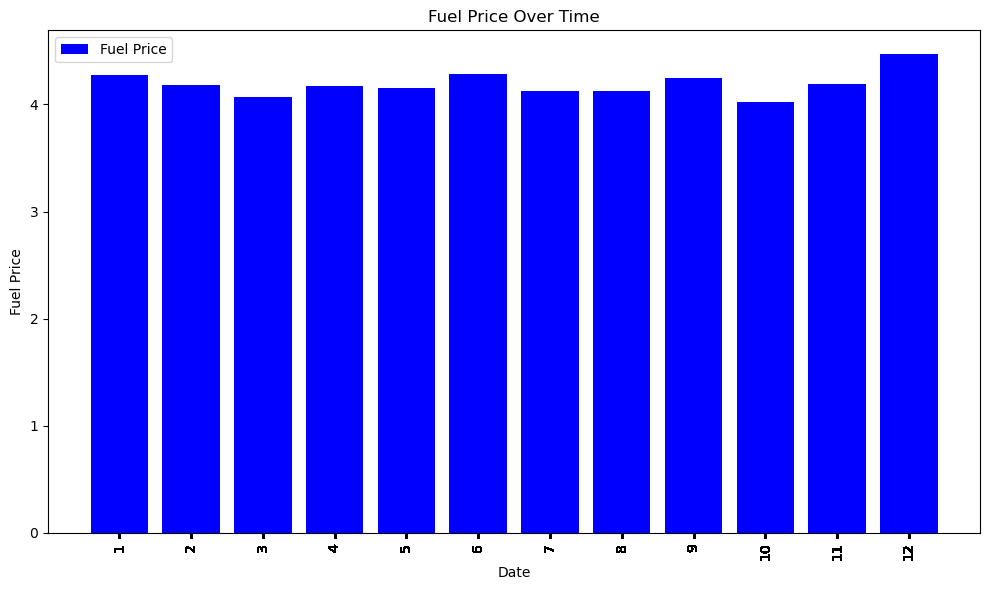

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'FSD.csv'
df = pd.read_csv(file)

df['Fuel_Price'] = pd.to_numeric(df['Fuel_Price'], errors='coerce') # NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with NaN values in critical columns for plotting
df_cleaned = df.dropna(subset=['Date', 'Fuel_Price']).copy()

# # Add a new column to the cleaned DataFrame
# df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
# print(df_cleaned['Month'])
# Summarize the data by yearḥ
summary = df_cleaned.groupby('Month').agg({'Fuel_Price': 'mean'}).reset_index()

# Plotting Fuel Price over Time
plt.figure(figsize=(10,6))
plt.bar(df_cleaned['Month'], df_cleaned['Fuel_Price'], label='Fuel Price', color='blue')
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.legend()
plt.xticks(df_cleaned['Month'],rotation=90)
plt.tight_layout()
plt.show()

# Temperature over time

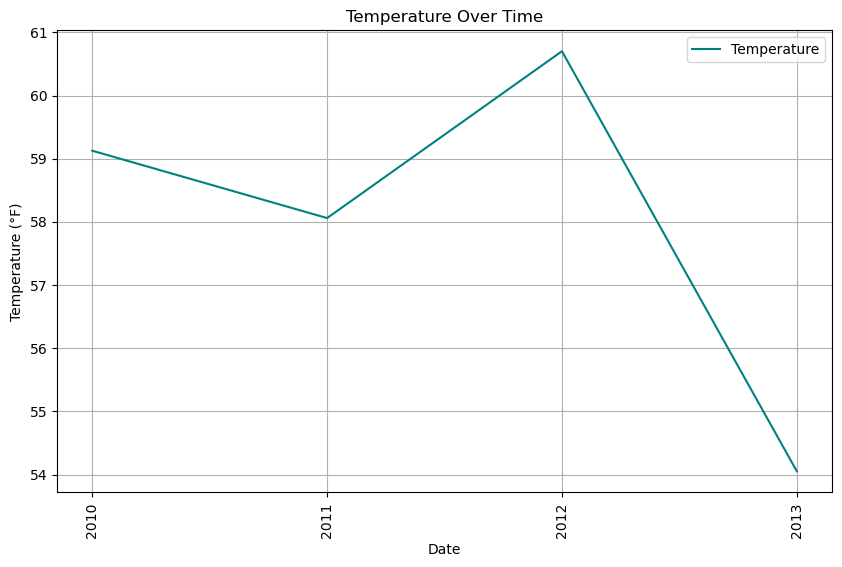

In [5]:
df['Fuel_Price'] = pd.to_numeric(df['Fuel_Price'], errors='coerce') # NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with NaN values in critical columns for plotting
df_cleaned = df.dropna(subset=['Date', 'Fuel_Price']).copy()

# Add a new column to the cleaned DataFrame
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
# print(df_cleaned['Month'])
# Summarize the data by yearḥ
summary = df_cleaned.groupby('Year').agg({'Temperature': 'mean'}).reset_index()

# Plotting Temperature over Time
plt.figure(figsize=(10,6))
plt.plot(summary['Year'], summary['Temperature'], label='Temperature', color='teal')

plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()

plt.grid(True)
plt.xticks(summary['Year'],rotation=90)
plt.show()

# Effect of CPI on Un-Employment

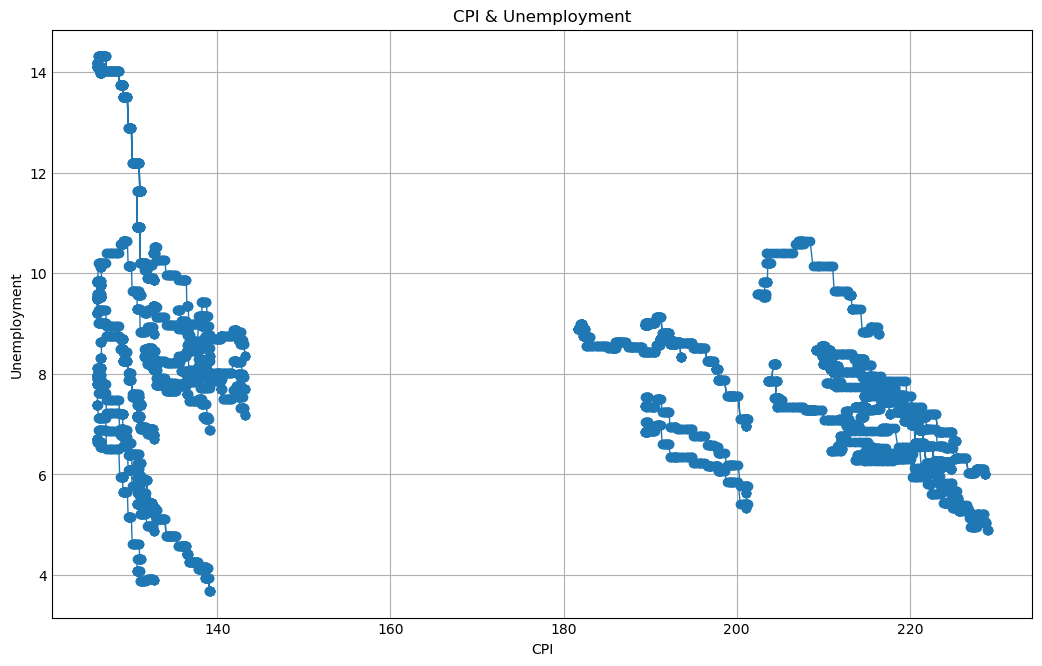

In [6]:
# CPI & Unemployment

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
# make data:
x = df['CPI']
y = df['Unemployment']

# plot
plt.title('CPI & Unemployment')
plt.xlabel('CPI')
plt.ylabel('Unemployment')
plt.grid(True)
plt.plot(x, y, marker='o',  linewidth=1.0)
plt.show()


# Testing by grouping CPI

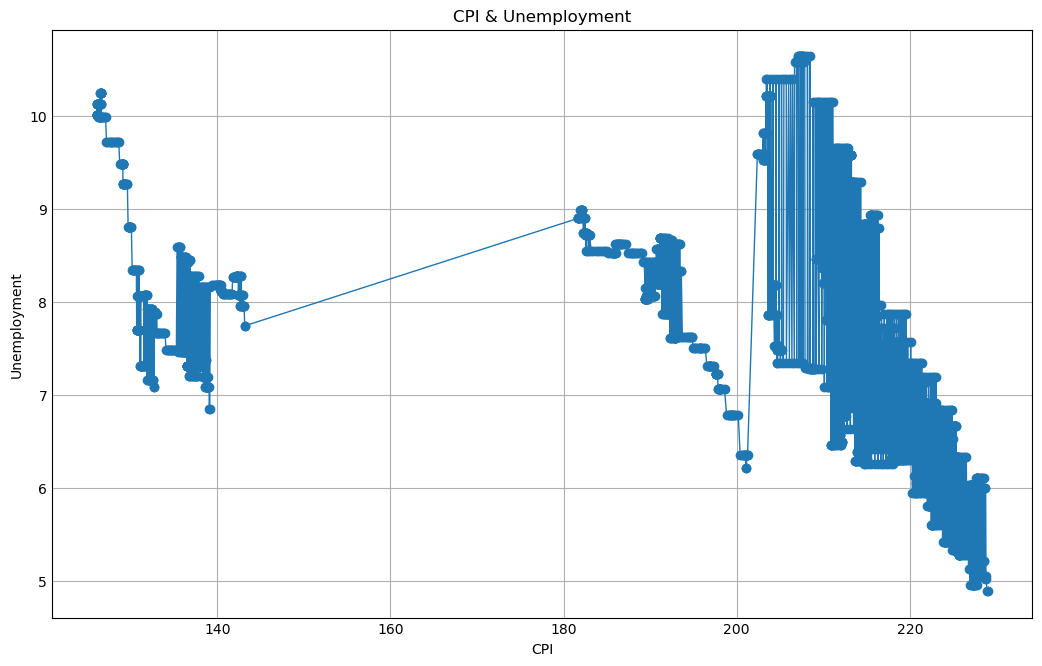

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'FSD.csv'
df = pd.read_csv(file)

df['CPI'] = pd.to_numeric(df['CPI'], errors='coerce') # NaT
df['Unemployment'] = pd.to_numeric(df['Unemployment'], errors='coerce') # NaN


df_cleaned = df.dropna(subset=['CPI', 'Unemployment']).copy()
summary = df_cleaned.groupby('CPI').agg({'Unemployment': 'mean'}).reset_index()

# CPI & Unemployment

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
# make data:
x = summary['CPI']
y = summary['Unemployment']

# plot
plt.title('CPI & Unemployment')
plt.xlabel('CPI')
plt.ylabel('Unemployment')
plt.grid(True)
plt.plot(x, y, marker='o',  linewidth=1.0)
plt.show()

# Fuel price distribution using histogram

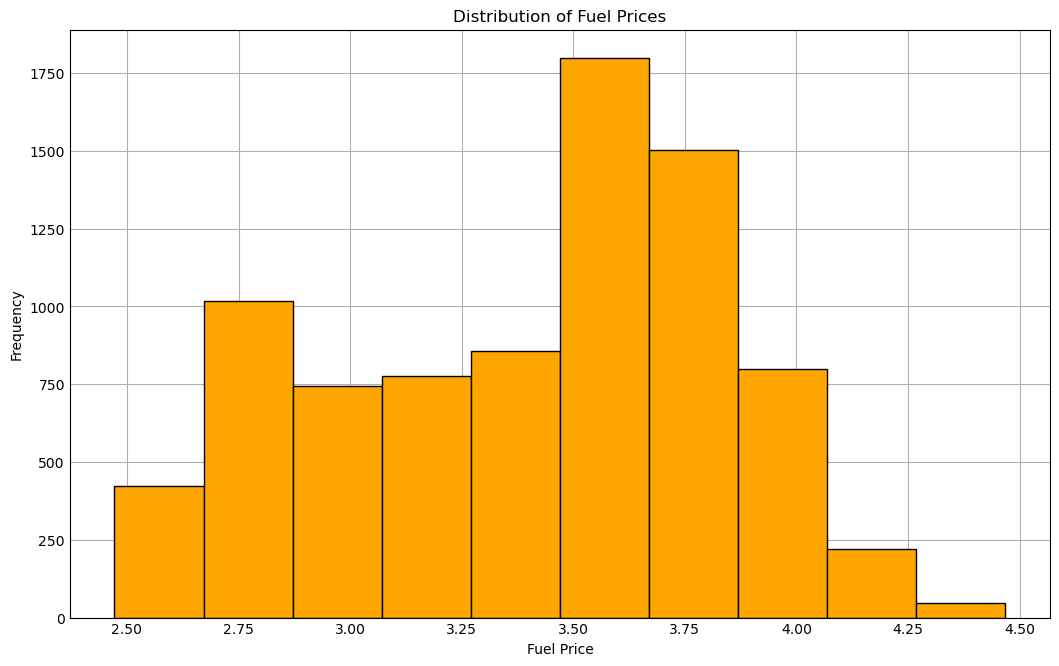

In [8]:
# Histogram for Fuel Price distribution
plt.figure(figsize=(10,6))
plt.hist(df['Fuel_Price'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Fuel Prices')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.show()

---

# 4.Effect of fuel prices over temperature

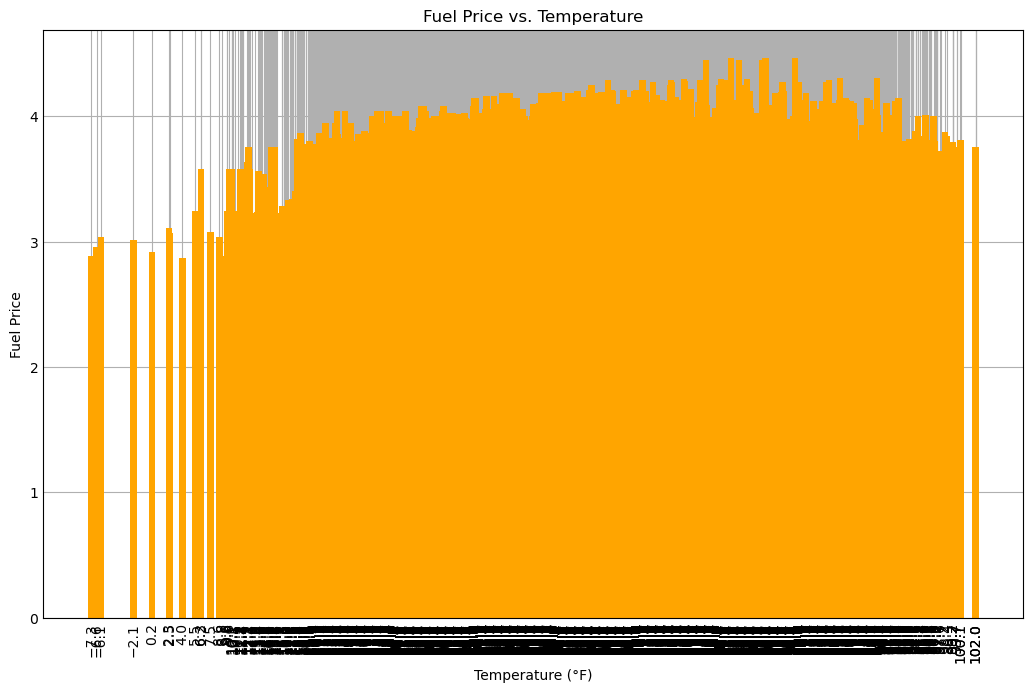

In [9]:

x = df['Temperature']
y = df['Fuel_Price']

plt.figure(figsize=(10,6))
plt.bar(x, y,label="Fuel Price", color='orange')

plt.title('Fuel Price vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Fuel Price')
plt.xticks(x,rotation=90)
plt.grid(True)
plt.show()

---

# Average fuel prices over the years


Extract year from the Date column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year

To solve the above error i used .loc as suggested by which it creates a new column to the data
df_cleaned.loc[:, 'Year'] = df_cleaned['Date'].dt.year

It also not worked so i copied the data 
df_cleaned = df.dropna(subset=['Date', 'Fuel_Price']).copy()


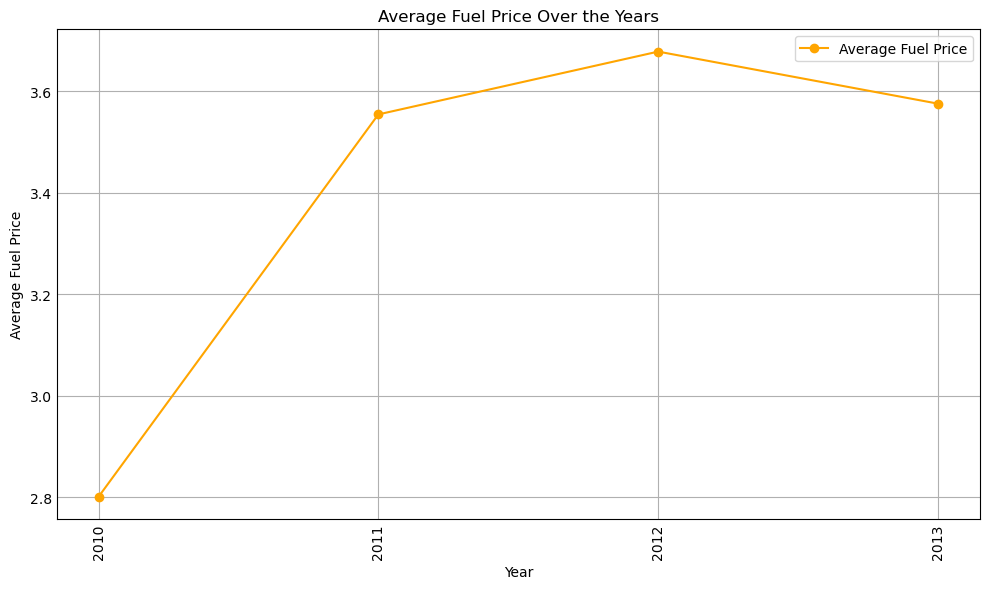

In [10]:

# Ensure relevant columns are numeric and date column is parsed as datetime
df['Fuel_Price'] = pd.to_numeric(df['Fuel_Price'], errors='coerce') # NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with NaN values in critical columns for plotting
df_cleaned = df.dropna(subset=['Date', 'Fuel_Price']).copy()

# Add a new column to the cleaned DataFrame
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
# print(df_cleaned['Month'])
# Summarize the data by yearḥ
summary = df_cleaned.groupby('Year').agg({'Fuel_Price': 'mean'}).reset_index()

# Plot the fuel price over time (using line plot)
plt.figure(figsize=(10, 6))

plt.plot(summary['Year'], summary['Fuel_Price'], marker='o', color='orange', label='Average Fuel Price')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Fuel Price')
plt.title('Average Fuel Price Over the Years')

plt.xticks(summary['Year'],rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# Fuel price with holiday

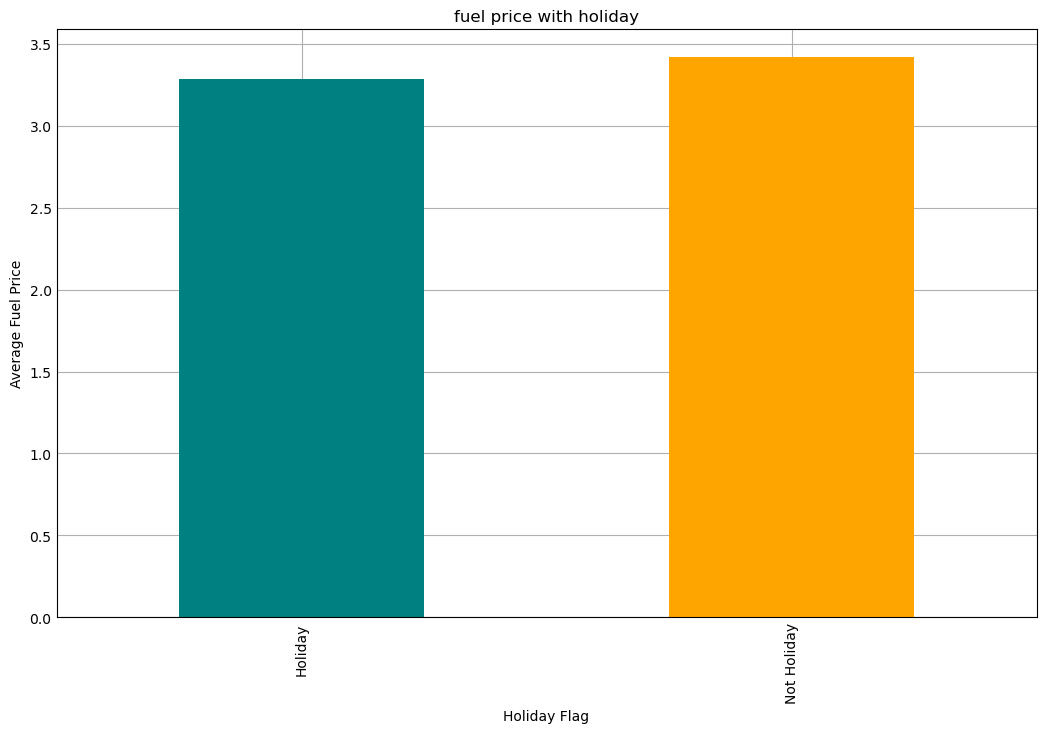

In [11]:
df['Holiday_Flag'] = df['IsHoliday'].apply(lambda x : "Holiday" if x else "Not Holiday")

holiday_fuel = df.groupby('Holiday_Flag')['Fuel_Price'].mean()

# Plot a bar graph
plt.figure(figsize=(10, 6))
holiday_fuel.plot(kind='bar', color=['teal', 'orange'])

# Add labels
plt.title('fuel price with holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Fuel Price')
plt.show()

# storewise CPI(Consumer price index )

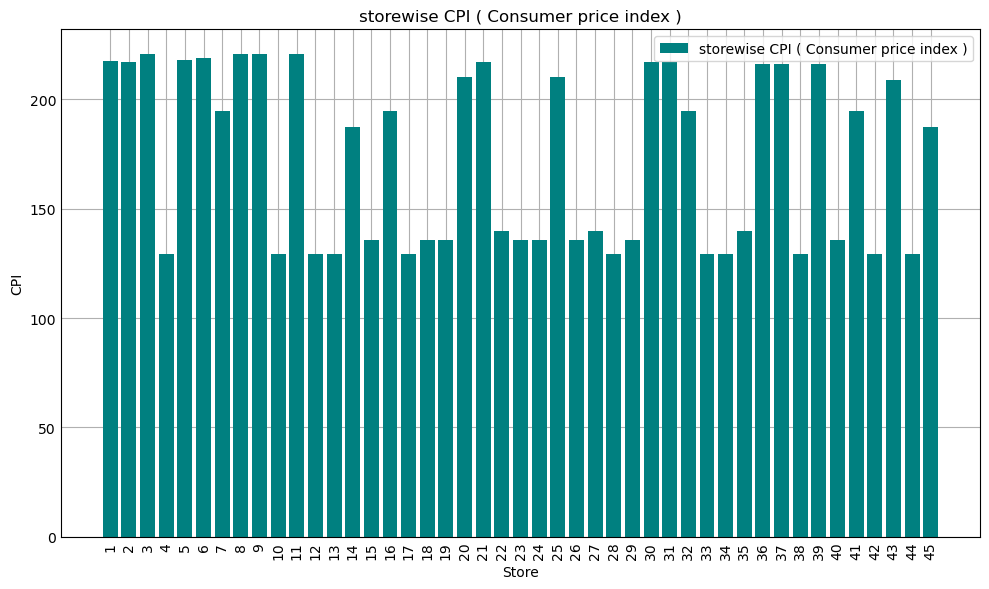

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
file = 'FSD.csv'

df = pd.read_csv(file)

# then convert fuel price to numeric
df['Store'] = pd.to_numeric(df['Store'], errors='coerce')# convert fuel_price in numeric
df['CPI'] = pd.to_numeric(df['CPI'], errors='coerce')
#here drop null values
data_cleaned = df.dropna(subset=['Store','CPI'])

Grouped_Data = data_cleaned.groupby('Store').agg({'CPI':'mean'}).reset_index()

x = Grouped_Data['Store']
y = Grouped_Data['CPI']

plt.figure(figsize=(10,6))
plt.bar(x,y,color = 'teal',label ='storewise CPI ( Consumer price index )')
plt.xlabel('Store')
plt.ylabel('CPI')
plt.title('storewise CPI ( Consumer price index )')
plt.xticks(x,rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Same as above but used seaborn

<Figure size 1000x500 with 0 Axes>

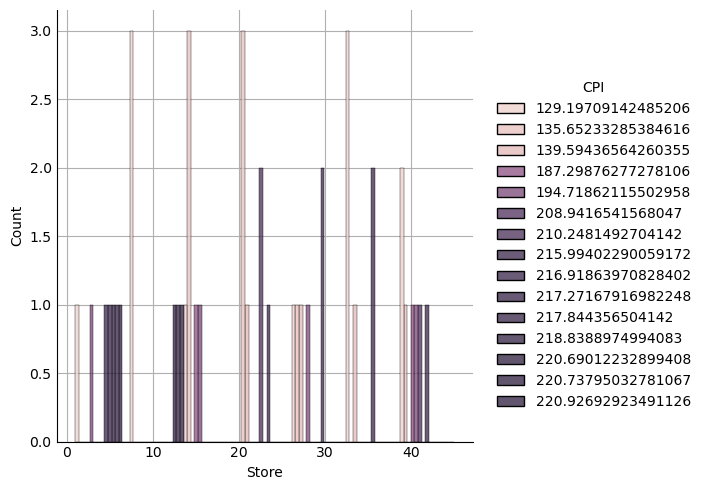

In [13]:
plt.figure(figsize=(10,5))
Grouped_Data = df.groupby('Store').agg({'CPI': 'mean'}).reset_index()
y = Grouped_Data['CPI']
x = Grouped_Data['Store']
sns.displot(df, x=x, hue=y, multiple="dodge") # used multiple="dodge",multiple="stack", kind="kde" but it is not good

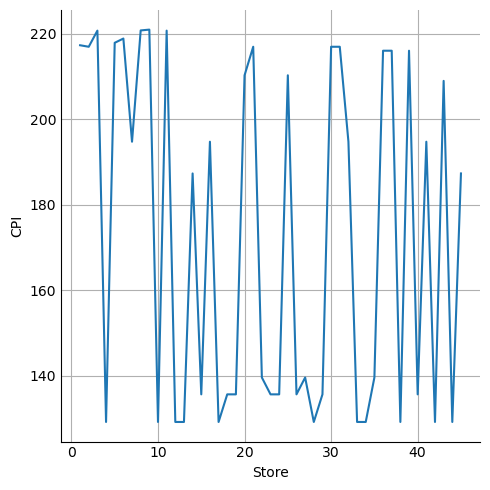

In [14]:
Grouped_Data = df.groupby('Store').agg({'CPI': 'mean'}).reset_index()
sns.relplot(x = "Store",y = "CPI", data=Grouped_Data, kind="line")


# Unemployment per year

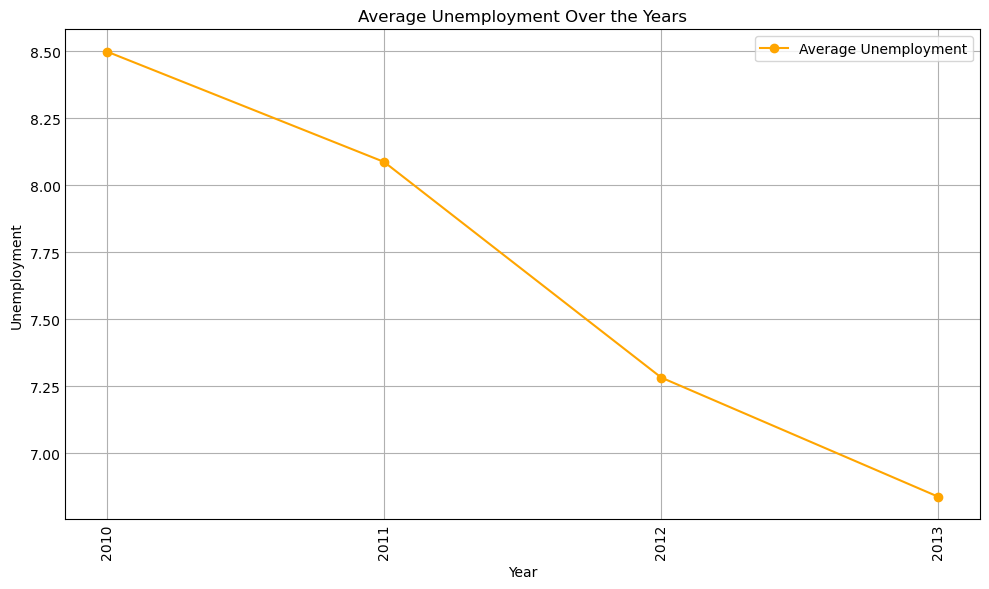

In [15]:

file = 'FSD.csv'
df = pd.read_csv(file)
df_cleaned = df.dropna(subset=['Date', 'Unemployment']).copy()

df['Unemployment'] = pd.to_numeric(df['Unemployment'], errors='coerce')
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Date'].dt.year

summary = df_cleaned.groupby('Year').agg({'Unemployment': 'mean'}).reset_index()

# Plot the fuel price over time (using line plot)
plt.figure(figsize=(10, 6))
plt.plot(summary['Year'], summary['Unemployment'], marker='o', color='orange', label='Average Unemployment')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment')
plt.title('Average Unemployment Over the Years')
plt.xticks(summary['Year'],rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

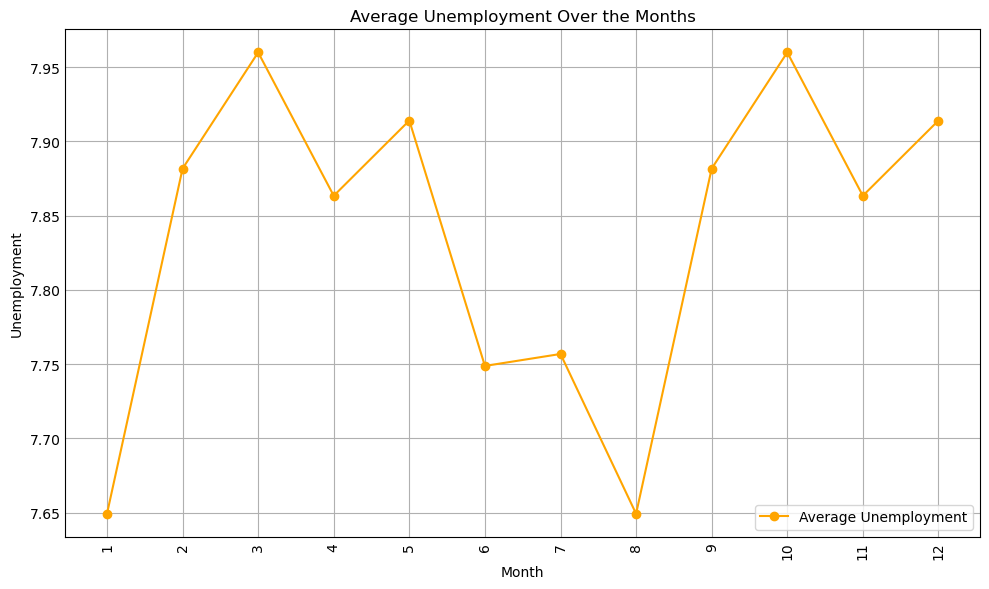

In [16]:
df['Unemployment'] = pd.to_numeric(df['Unemployment'], errors='coerce')
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Month'] = df_cleaned['Date'].dt.month

summary = df_cleaned.groupby('Month').agg({'Unemployment': 'mean'}).reset_index()

# Plot the fuel price over time (using line plot)
plt.figure(figsize=(10, 6))
plt.plot(summary['Month'], summary['Unemployment'], marker='o', color='orange', label='Average Unemployment')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Unemployment')
plt.title('Average Unemployment Over the Months')
plt.xticks(summary['Month'],rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

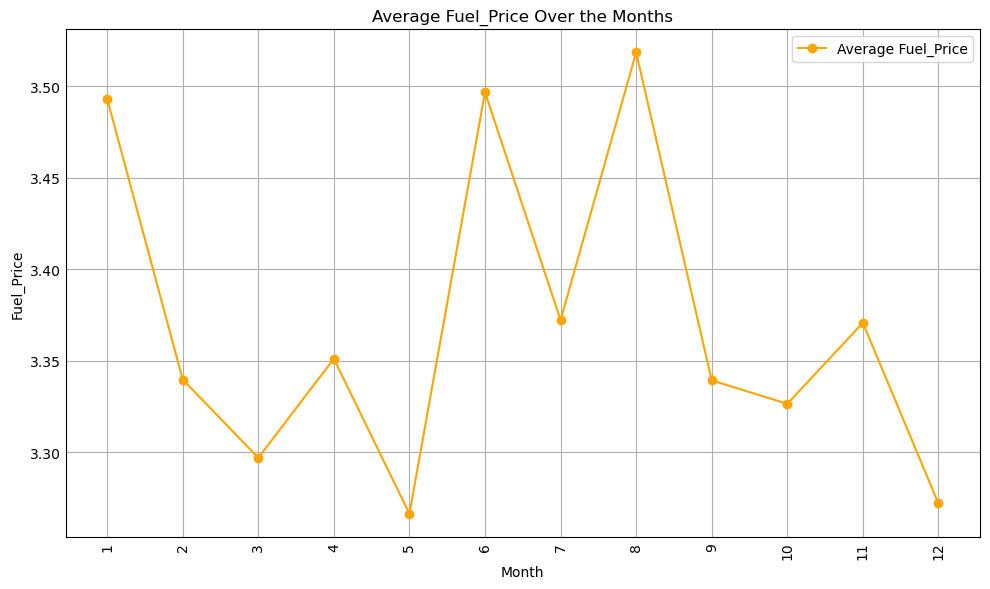

In [17]:
df['Fuel_Price'] = pd.to_numeric(df['Fuel_Price'], errors='coerce')
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Month'] = df_cleaned['Date'].dt.month

summary = df_cleaned.groupby('Month').agg({'Fuel_Price': 'mean'}).reset_index()

# Plot the fuel price over time (using line plot)
plt.figure(figsize=(10, 6))
plt.plot(summary['Month'], summary['Fuel_Price'], marker='o', color='orange', label='Average Fuel_Price')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Fuel_Price')
plt.title('Average Fuel_Price Over the Months')
plt.xticks(summary['Month'],rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Total MarkDowns over years

['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
['Year', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
[11697.193433723369, 4225.546998306744, 656.5783001115884, 5949.925827068902, 6883.5259691136525]
[2011, 2012, 2013]


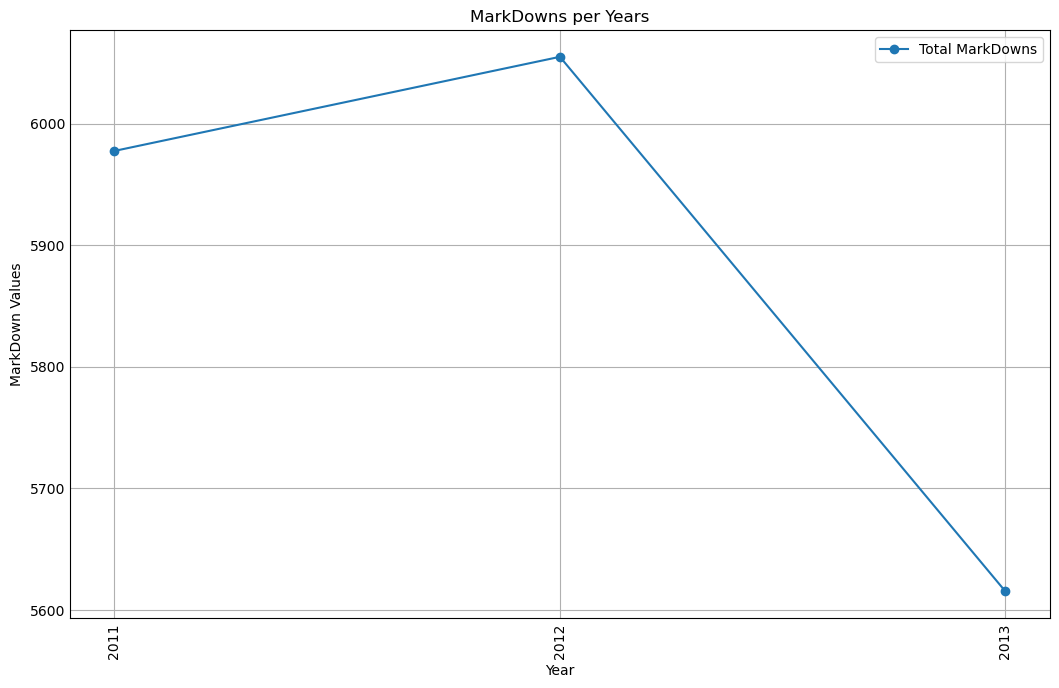

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
file = 'FSD.csv'
df = pd.read_csv(file)

# Convert 'Date' to datetime and clean up 'Unemployment'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' is missing
df_cleaned = df.dropna(subset=['Date']).copy()

# Extract the year from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# List of MarkDown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

print([x for x in markdown_columns] )

# Drop rows with NaN in the MarkDown columns for clean plotting
df_cleaned = df_cleaned.dropna(subset=markdown_columns)

# Group by 'Year' and sum the MarkDown columns
df_yearly_grouped_Data = df_cleaned.groupby('Year')[markdown_columns].mean().reset_index()

print([x for x in df_yearly_grouped_Data])


print([x for x in df_yearly_grouped_Data[markdown_columns].mean() ])
print([x for x in df_yearly_grouped_Data['Year']] )

# Plot the aggregated MarkDowns per year
plt.figure(figsize=(10,6))
plt.plot(df_yearly_grouped_Data['Year'], df_yearly_grouped_Data[markdown_columns].mean(axis=1), label='Total MarkDowns', marker='o')

plt.title('MarkDowns per Years')
plt.xlabel('Year')
plt.ylabel('MarkDown Values')
plt.xticks(df_yearly_grouped_Data['Year'],rotation=90)
plt.legend()
plt.show()


# Individual markdowns over the years

Markdown columns: ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
Markdown sum values: MarkDown1    11697.193434
MarkDown2     4225.546998
MarkDown3      656.578300
MarkDown4     5949.925827
MarkDown5     6883.525969
dtype: float64


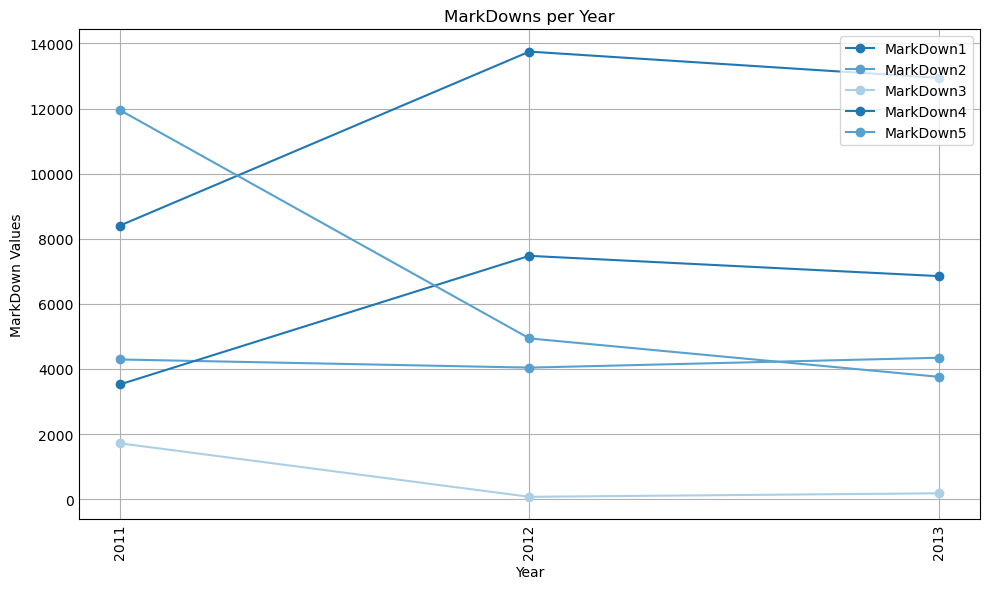

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
file = 'FSD.csv'
df = pd.read_csv(file)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' is missing
df_cleaned = df.dropna(subset=['Date']).copy()

# Extract the year from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# List of MarkDown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Drop rows with NaN in the MarkDown columns for clean plotting
df_cleaned = df_cleaned.dropna(subset=markdown_columns)

# Group by 'Year' and calculate the mean of the MarkDown columns
df_yearly_grouped_Data = df_cleaned.groupby('Year')[markdown_columns].mean().reset_index()

# Print to verify the matching of values
print("Markdown columns:", markdown_columns)
print("Markdown sum values:", df_yearly_grouped_Data[markdown_columns].mean())

# Plot each MarkDown column
plt.figure(figsize=(10, 6))
for column in markdown_columns:
    plt.plot(df_yearly_grouped_Data['Year'], df_yearly_grouped_Data[column], label=column, marker='o')

# Add titles and labels
plt.title('MarkDowns per Year')
plt.xlabel('Year')
plt.ylabel('MarkDown Values')
plt.xticks(df_yearly_grouped_Data['Year'], rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# MarkDown Values for Each Store Over Years

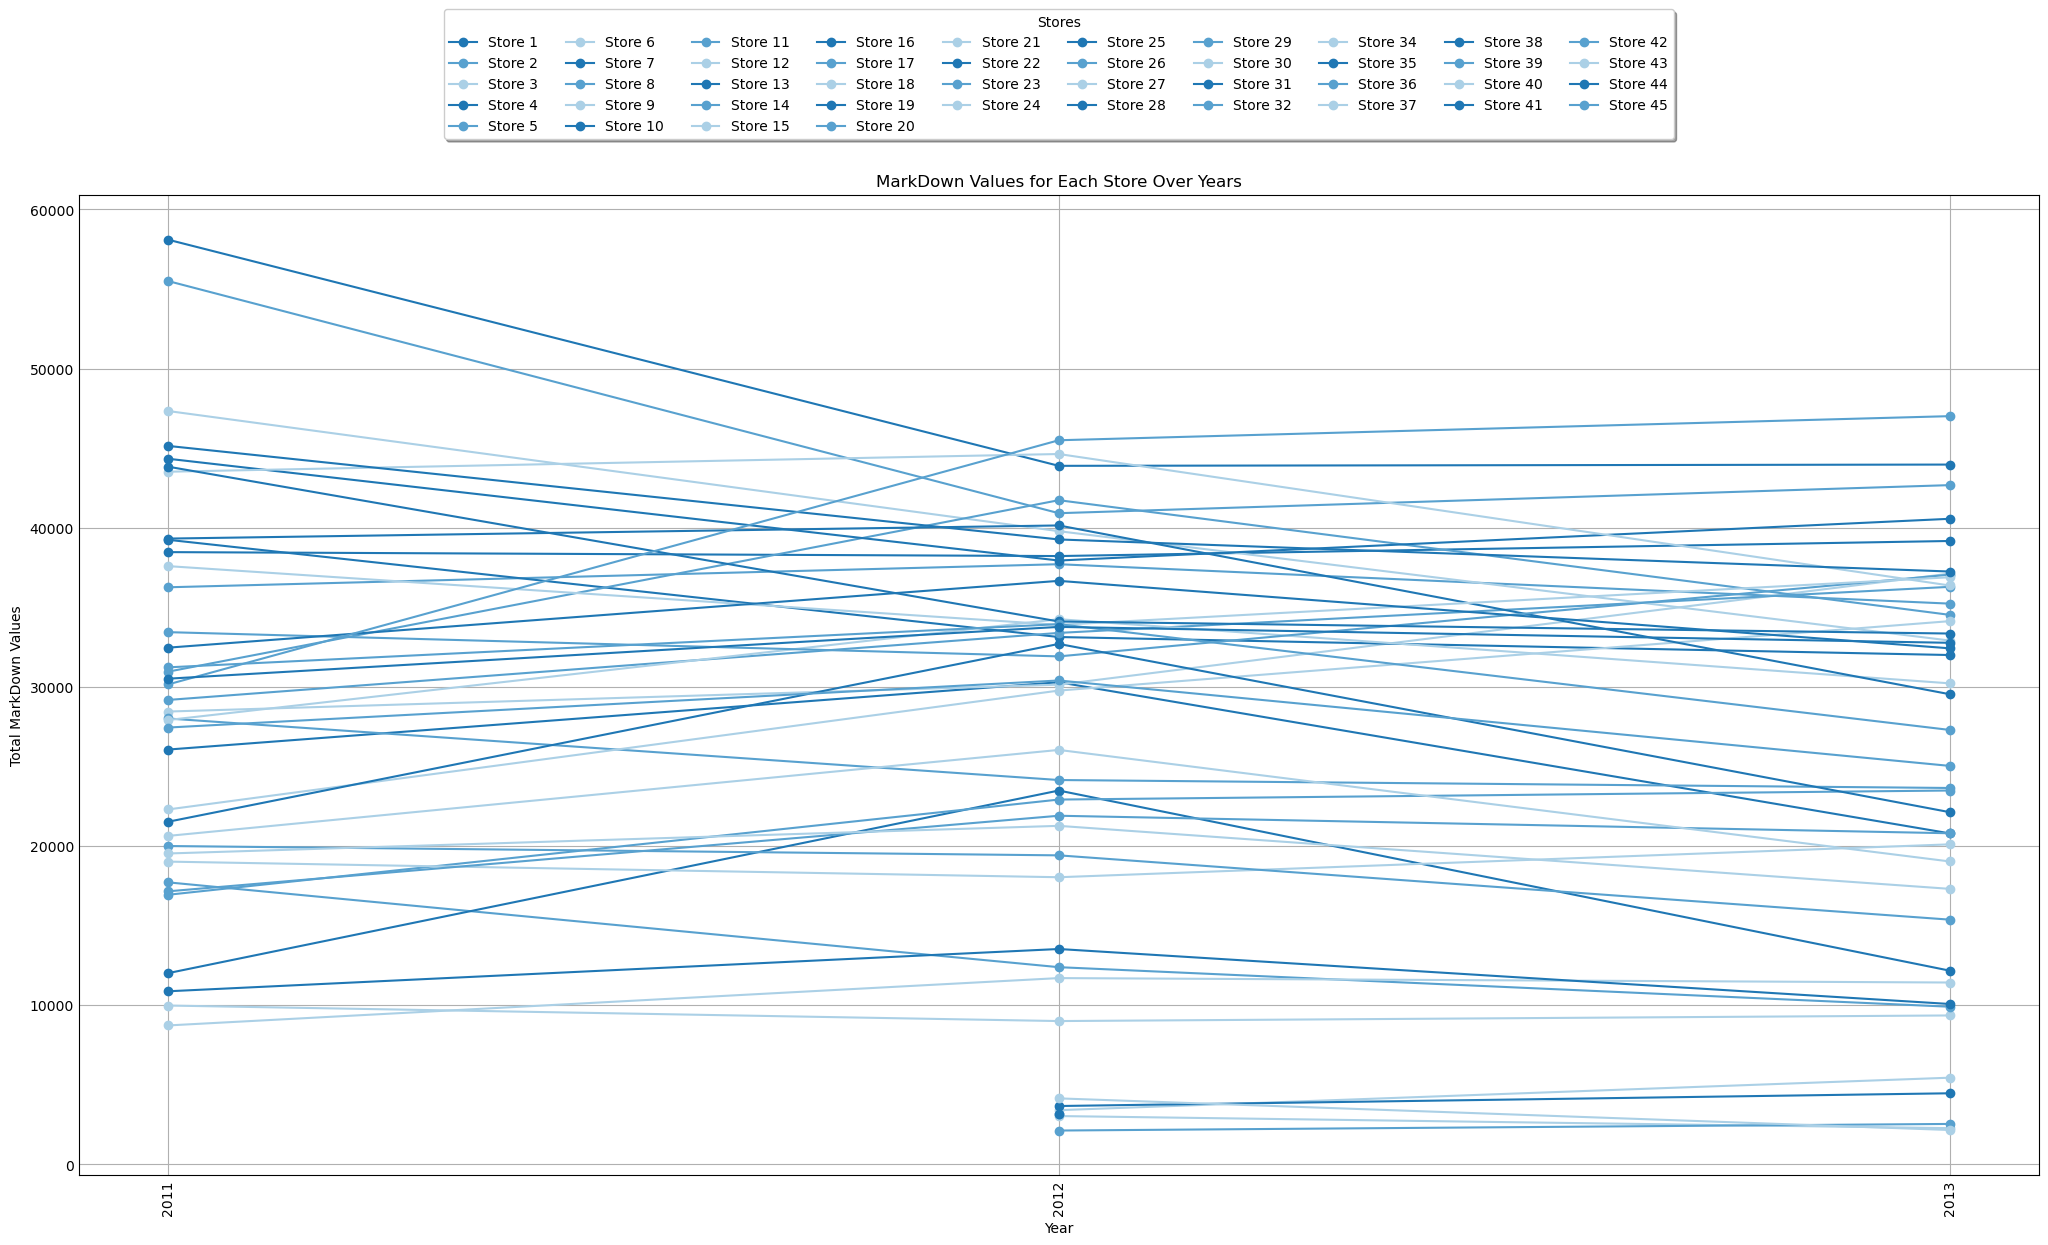

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
file = 'FSD.csv'
df = pd.read_csv(file)

# Convert 'Store' and 'Year' columns to numeric, coercing errors to NaN
df['Store'] = pd.to_numeric(df['Store'], errors='coerce')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' is missing
df_cleaned = df.dropna(subset=['Date']).copy()

# Extract the year from the 'Date' column
df['Year'] = df_cleaned['Date'].dt.year

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# List of MarkDown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Drop rows with NA in the MarkDown columns, 'Store', and 'Year'
df_cleaned = df.dropna(subset=markdown_columns + ['Store', 'Year'])

# Grouping by 'Store' and 'Year', and compute the mean of the MarkDown columns
df_grouped = df_cleaned.groupby(['Store', 'Year'])[markdown_columns].mean().reset_index()

# Plot the aggregated MarkDowns for each store over the years
plt.figure(figsize=(20, 10))

# Loop over each store and plot its markdown values over the years
for store in df_grouped['Store'].unique():
    store_data = df_grouped[df_grouped['Store'] == store]
    
    # Plot the total markdown (sum of all markdown columns) for each store
    plt.plot(store_data['Year'], store_data[markdown_columns].sum(axis=1), label=f'Store {int(store)}', marker='o')

# Set plot title and labels
plt.title('MarkDown Values for Each Store Over Years')
plt.xlabel('Year')
plt.ylabel('Total MarkDown Values')

# Rotate x-axis labels to avoid overlap
plt.xticks(df_grouped['Year'].unique(), rotation=90)

# Display the legend and plot
plt.legend(title="Stores", loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=10, fancybox=True, shadow=True)
plt.grid(True)
plt.show()

